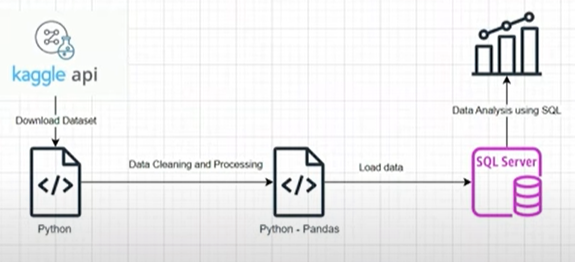

In [75]:
from IPython.display import Image, display

display(Image(filename="D:\DATA\dataportfolio\images\Kaggle-SQL-Python.PNG"))


In [6]:
#import libraries
!pip install kaggle
import kaggle

#import datasets from kaggle API
!kaggle datasets download ankitbansal06/retail-orders -f orders.csv

Dataset URL: https://www.kaggle.com/datasets/ankitbansal06/retail-orders
License(s): CC0-1.0
orders.csv: Skipping, found more recently modified local copy (use --force to force download)


In [7]:
#extract zipfile
import zipfile
zip_ref = zipfile.ZipFile('order.zip')
zip_ref.extractall()
zip_ref.close()

In [22]:
#read file
import pandas as pd
df = pd.read_csv('orders.csv')
df.head(20)

,Order Id,Order Date,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub Category,Product Id,cost price,List Price,Quantity,Discount Percent
0,1,2023-03-01,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,FUR-BO-10001798,240,260,2,2
1,2,2023-08-15,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,FUR-CH-10000454,600,730,3,3
2,3,2023-01-10,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,OFF-LA-10000240,10,10,2,5
3,4,2022-06-18,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,FUR-TA-10000577,780,960,5,2
4,5,2022-07-13,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,OFF-ST-10000760,20,20,2,5
5,6,2022-03-13,Not Available,Consumer,United States,Los Angeles,California,90032,West,Furniture,Furnishings,FUR-FU-10001487,50,50,7,3
6,7,2022-12-28,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Art,OFF-AR-10002833,10,10,4,3
7,8,2022-01-25,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Technology,Phones,TEC-PH-10002275,860,910,6,5
8,9,2023-03-23,Not Available,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Binders,OFF-BI-10003910,20,20,3,2
9,10,2023-05-16,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Appliances,OFF-AP-10002892,90,110,5,3


In [33]:
# Null values

# Option 1
# df['Ship Mode']= df['Ship Mode'].apply(lambda x: np.nan if x in {'unknown', 'Not Available'} else x)
# df['Ship Mode'].unique()

# Option 2: shift+tab to get 'na_values'
df = pd.read_csv('orders.csv', na_values=['unknown', 'Not Available'])
df['Ship Mode'].unique()

array(['Second Class', 'Standard Class', nan, 'First Class', 'Same Day'],
      dtype=object)

In [32]:
# Rename column - format 'aaa_bbb'
# Option 1
#df.rename(columns={
#    'Order Id':'order_id',
#    'Order Date':'order_date',
#    'Ship Mode':'ship_mode',
#    'Segment':'segment',
#    'Country':'country',
#    'City':'city',
#    'State':'state',
#    'Postal Code':'postal_code',
#    'Region':'region',
#    'Category':'category',
#    'Sub Category':'sub_category',
#    'Product Id':'product_id',
#    'cost price':'cost_price',
#    'List Price':'list_price',
#    'Quanity':'quantity',
#    'Discount Percent':'discount_percent'
#})
#df.columns

Index(['Order Id', 'Order Date', 'Ship Mode', 'Segment', 'Country', 'City',
       'State', 'Postal Code', 'Region', 'Category', 'Sub Category',
       'Product Id', 'cost price', 'List Price', 'Quantity',
       'Discount Percent'],
      dtype='object')

In [49]:
# Rename column - format 'aaa_bbb'
# Option 2
#df.columns=df.columns.str.lower()
df.columns = df.columns.str.replace(' ','_')
df.head(5)

,order_id,order_date,ship_mode,segment,country,city,state,postal_code,region,category,sub_category,product_id,cost_price,list_price,quantity,discount_percent
0,1,2023-03-01,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,FUR-BO-10001798,240,260,2,2
1,2,2023-08-15,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,FUR-CH-10000454,600,730,3,3
2,3,2023-01-10,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,OFF-LA-10000240,10,10,2,5
3,4,2022-06-18,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,FUR-TA-10000577,780,960,5,2
4,5,2022-07-13,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,OFF-ST-10000760,20,20,2,5


In [59]:
# Add discount column
#df['discount']=df['list_price']*df['discount_percent']/100

# Add sales column
#df['sales']=df['list_price']-df['discount']

# Add profit column
# df['profit'] = df['sales']-df['cost_price']

# Add margin column
df['margin'] = df['profit']/df['sales']
df.head(5)

,order_id,order_date,ship_mode,segment,country,city,state,postal_code,region,category,sub_category,product_id,cost_price,list_price,quantity,discount_percent,discount,sales,profit,margin
0,1,2023-03-01,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,FUR-BO-10001798,240,260,2,2,5.2,254.8,14.8,0.058085
1,2,2023-08-15,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,FUR-CH-10000454,600,730,3,3,21.9,708.1,108.1,0.152662
2,3,2023-01-10,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,OFF-LA-10000240,10,10,2,5,0.5,9.5,-0.5,-0.052632
3,4,2022-06-18,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,FUR-TA-10000577,780,960,5,2,19.2,940.8,160.8,0.170918
4,5,2022-07-13,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,OFF-ST-10000760,20,20,2,5,1.0,19.0,-1.0,-0.052632


In [66]:
# Date Datatypes
# df.dtypes
df['order_date']=pd.to_datetime(df['order_date'], format = "%Y-%m-%d")
df.head(5)

,order_id,order_date,ship_mode,segment,country,city,state,postal_code,region,category,sub_category,product_id,cost_price,list_price,quantity,discount_percent,discount,sales,profit,margin
0,1,2023-03-01,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,FUR-BO-10001798,240,260,2,2,5.2,254.8,14.8,0.058085
1,2,2023-08-15,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,FUR-CH-10000454,600,730,3,3,21.9,708.1,108.1,0.152662
2,3,2023-01-10,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,OFF-LA-10000240,10,10,2,5,0.5,9.5,-0.5,-0.052632
3,4,2022-06-18,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,FUR-TA-10000577,780,960,5,2,19.2,940.8,160.8,0.170918
4,5,2022-07-13,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,OFF-ST-10000760,20,20,2,5,1.0,19.0,-1.0,-0.052632


In [71]:
# Upload to sql server
import sqlalchemy as sal
engine = sal.create_engine("mssql+pyodbc://DESKTOP-ODQGQIO\\SQLEXPRESS/master?driver=ODBC+Driver+17+for+SQL+Server&trusted_connection=yes")
conn = engine.connect()

In [73]:
# Load data to sql server
df.to_sql('df_retail_order', con = conn, index = False, if_exists = 'append')

10